In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('mashroom_dataset.csv')
ds.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
ds=pd.DataFrame(data=ds)
ds

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
le=LabelEncoder()

In [5]:
for col in ds.columns:
    ds[col]=le.fit_transform(ds[col])

In [6]:
columns = ds.columns.values
for column in columns:
    print("{0}: {1}".format(column, ds[column].unique()))

p: [0 1]
x: [5 0 4 2 3 1]
s: [2 3 0 1]
n: [9 8 3 4 2 5 0 7 1 6]
t: [1 0]
p.1: [0 3 6 5 2 1 8 7 4]
f: [1 0]
c: [0 1]
n.1: [0 1]
k: [ 4  5  2  7 10  3  9  1  0  8 11  6]
e: [0 1]
e.1: [2 3 1 4 0]
s.1: [2 0 1 3]
s.2: [2 0 3 1]
w: [7 3 6 4 0 2 5 1 8]
w.1: [7 6 3 0 4 2 8 5 1]
p.2: [0]
w.2: [2 0 1 3]
o: [1 2 0]
p.3: [4 0 2 1 3]
k.1: [3 2 6 1 7 5 4 8 0]
s.3: [2 3 0 4 5 1]
u: [1 3 5 0 4 6 2]


In [7]:
ds.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [8]:
ds=ds.drop('p.2',axis=1)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   p       8123 non-null   int32
 1   x       8123 non-null   int32
 2   s       8123 non-null   int32
 3   n       8123 non-null   int32
 4   t       8123 non-null   int32
 5   p.1     8123 non-null   int32
 6   f       8123 non-null   int32
 7   c       8123 non-null   int32
 8   n.1     8123 non-null   int32
 9   k       8123 non-null   int32
 10  e       8123 non-null   int32
 11  e.1     8123 non-null   int32
 12  s.1     8123 non-null   int32
 13  s.2     8123 non-null   int32
 14  w       8123 non-null   int32
 15  w.1     8123 non-null   int32
 16  w.2     8123 non-null   int32
 17  o       8123 non-null   int32
 18  p.3     8123 non-null   int32
 19  k.1     8123 non-null   int32
 20  s.3     8123 non-null   int32
 21  u       8123 non-null   int32
dtypes: int32(22)
memory usage: 698.2 KB


In [10]:
ds.isnull().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [11]:
dscorr=ds.corr()

In [12]:
dscorr

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.1,s.2,w,w.1,w.2,o,p.3,k.1,s.3,u
p,1.000000,0.052826,0.178440,-0.031361,-0.501758,-0.093675,0.129188,-0.348358,0.539944,-0.530574,...,-0.334712,-0.298901,-0.154096,-0.146824,0.145133,-0.214349,-0.411942,0.172063,0.298776,0.216990
x,0.052826,1.000000,-0.050475,-0.048181,-0.035530,-0.022050,0.078850,0.013253,0.053872,-0.006010,...,-0.030507,-0.032668,-0.031741,-0.030473,0.072547,-0.106509,-0.025580,-0.073337,0.063484,-0.042492
s,0.178440,-0.050475,1.000000,-0.019398,0.070214,0.045220,-0.034183,-0.282302,0.208103,-0.161014,...,0.089081,0.107957,0.066041,0.068876,-0.016606,-0.026143,-0.106429,0.230382,0.021564,0.163893
n,-0.031361,-0.048181,-0.019398,1.000000,-0.000736,-0.387119,0.041440,0.144250,-0.169452,0.084654,...,-0.060822,-0.047697,0.002379,0.008073,0.036133,-0.005829,0.162545,-0.293548,-0.144785,0.033983
t,-0.501758,-0.035530,0.070214,-0.000736,1.000000,-0.061962,0.137347,-0.299438,-0.369897,0.527200,...,0.460777,0.458947,0.083456,0.092792,0.119759,0.056830,0.692933,-0.284943,0.088221,-0.075417
p.1,-0.093675,-0.022050,0.045220,-0.387119,-0.061962,1.000000,-0.059611,0.063987,0.310390,-0.129195,...,0.118552,0.061761,0.174477,0.169350,-0.057765,0.111939,-0.281519,0.469163,-0.043570,-0.026839
f,0.129188,0.078850,-0.034183,0.041440,0.137347,-0.059611,1.000000,0.071499,0.108969,-0.128563,...,-0.088933,-0.116191,0.099289,0.097150,0.897518,0.093242,-0.146716,-0.029512,0.165588,-0.030353
c,-0.348358,0.013253,-0.282302,0.144250,-0.299438,0.063987,0.071499,1.000000,-0.108268,0.100182,...,-0.212331,-0.213750,0.274618,0.253548,0.073371,0.243004,-0.195859,0.047289,-0.529296,-0.154611
n.1,0.539944,0.053872,0.208103,-0.169452,-0.369897,0.310390,0.108969,-0.108268,1.000000,-0.516767,...,0.056194,0.010788,0.296482,0.278636,0.103797,-0.171339,-0.461135,0.623217,0.147799,0.161107
k,-0.530574,-0.006010,-0.161014,0.084654,0.527200,-0.129195,-0.128563,0.100182,-0.516767,1.000000,...,0.224313,0.257247,-0.058283,-0.074765,-0.097579,0.096047,0.629462,-0.416167,-0.034105,-0.202967


<AxesSubplot:>

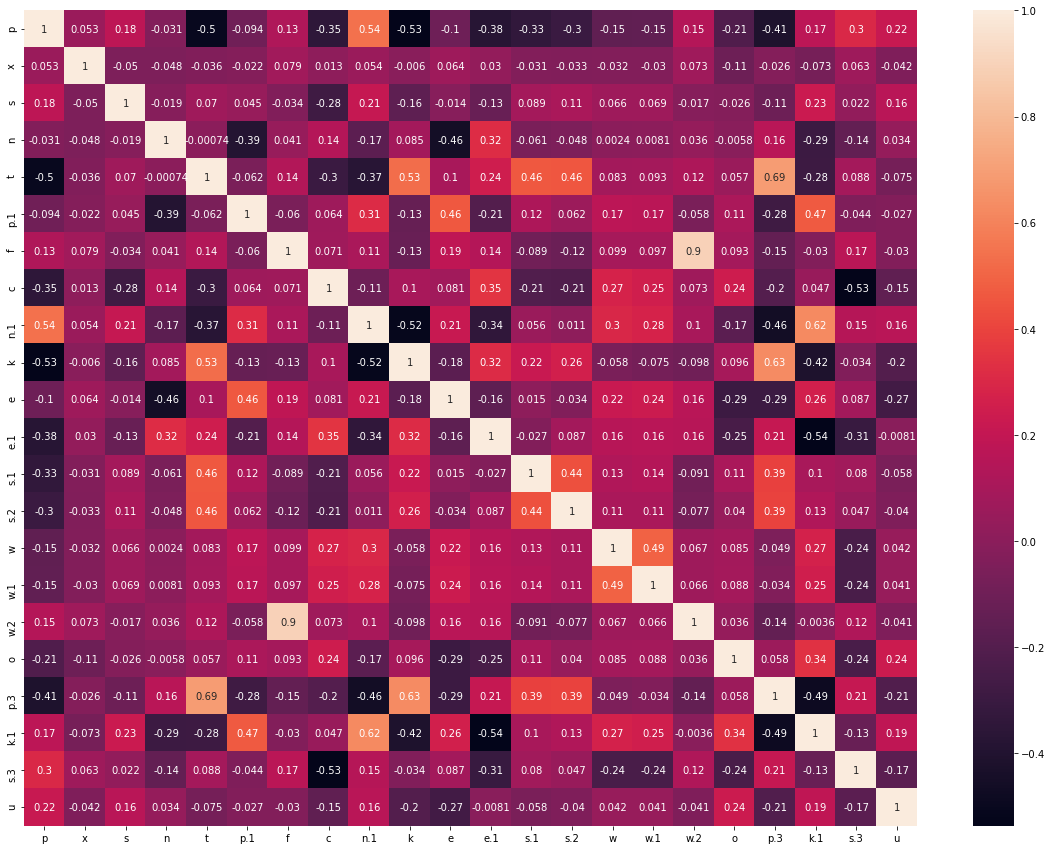

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(dscorr,annot=True)

<AxesSubplot:xlabel='p.3', ylabel='count'>

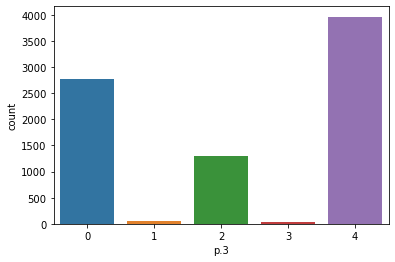

In [14]:
sns.countplot(ds['p.3'])

<AxesSubplot:xlabel='p', ylabel='count'>

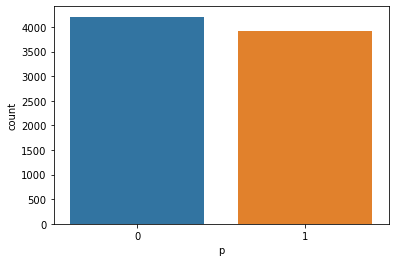

In [15]:
sns.countplot(ds['p'])

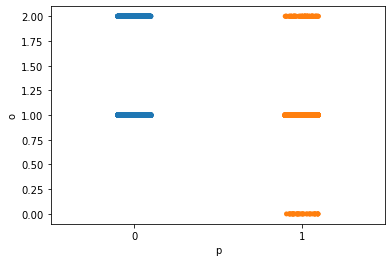

In [16]:
sns.stripplot(x='p',y='o',data=ds)
plt.show()

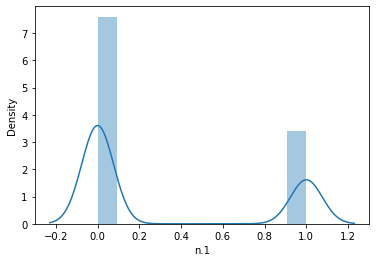

In [17]:
sns.distplot(ds['n.1'])
plt.show()

<AxesSubplot:xlabel='s'>

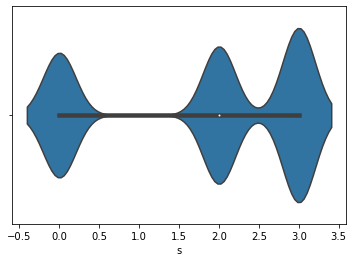

In [18]:
sns.violinplot(x='s',data=ds)

<AxesSubplot:xlabel='p', ylabel='n.1'>

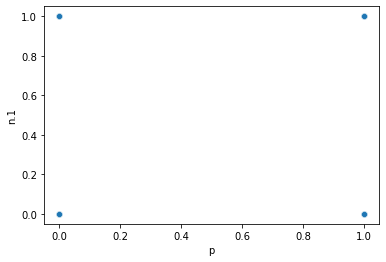

In [19]:
sns.scatterplot(x='p',y='n.1',data=ds)

<AxesSubplot:>

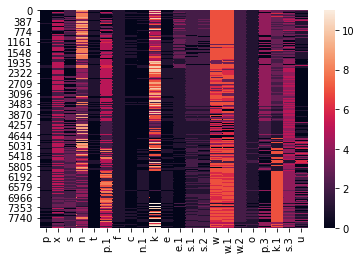

In [20]:
sns.heatmap(ds)

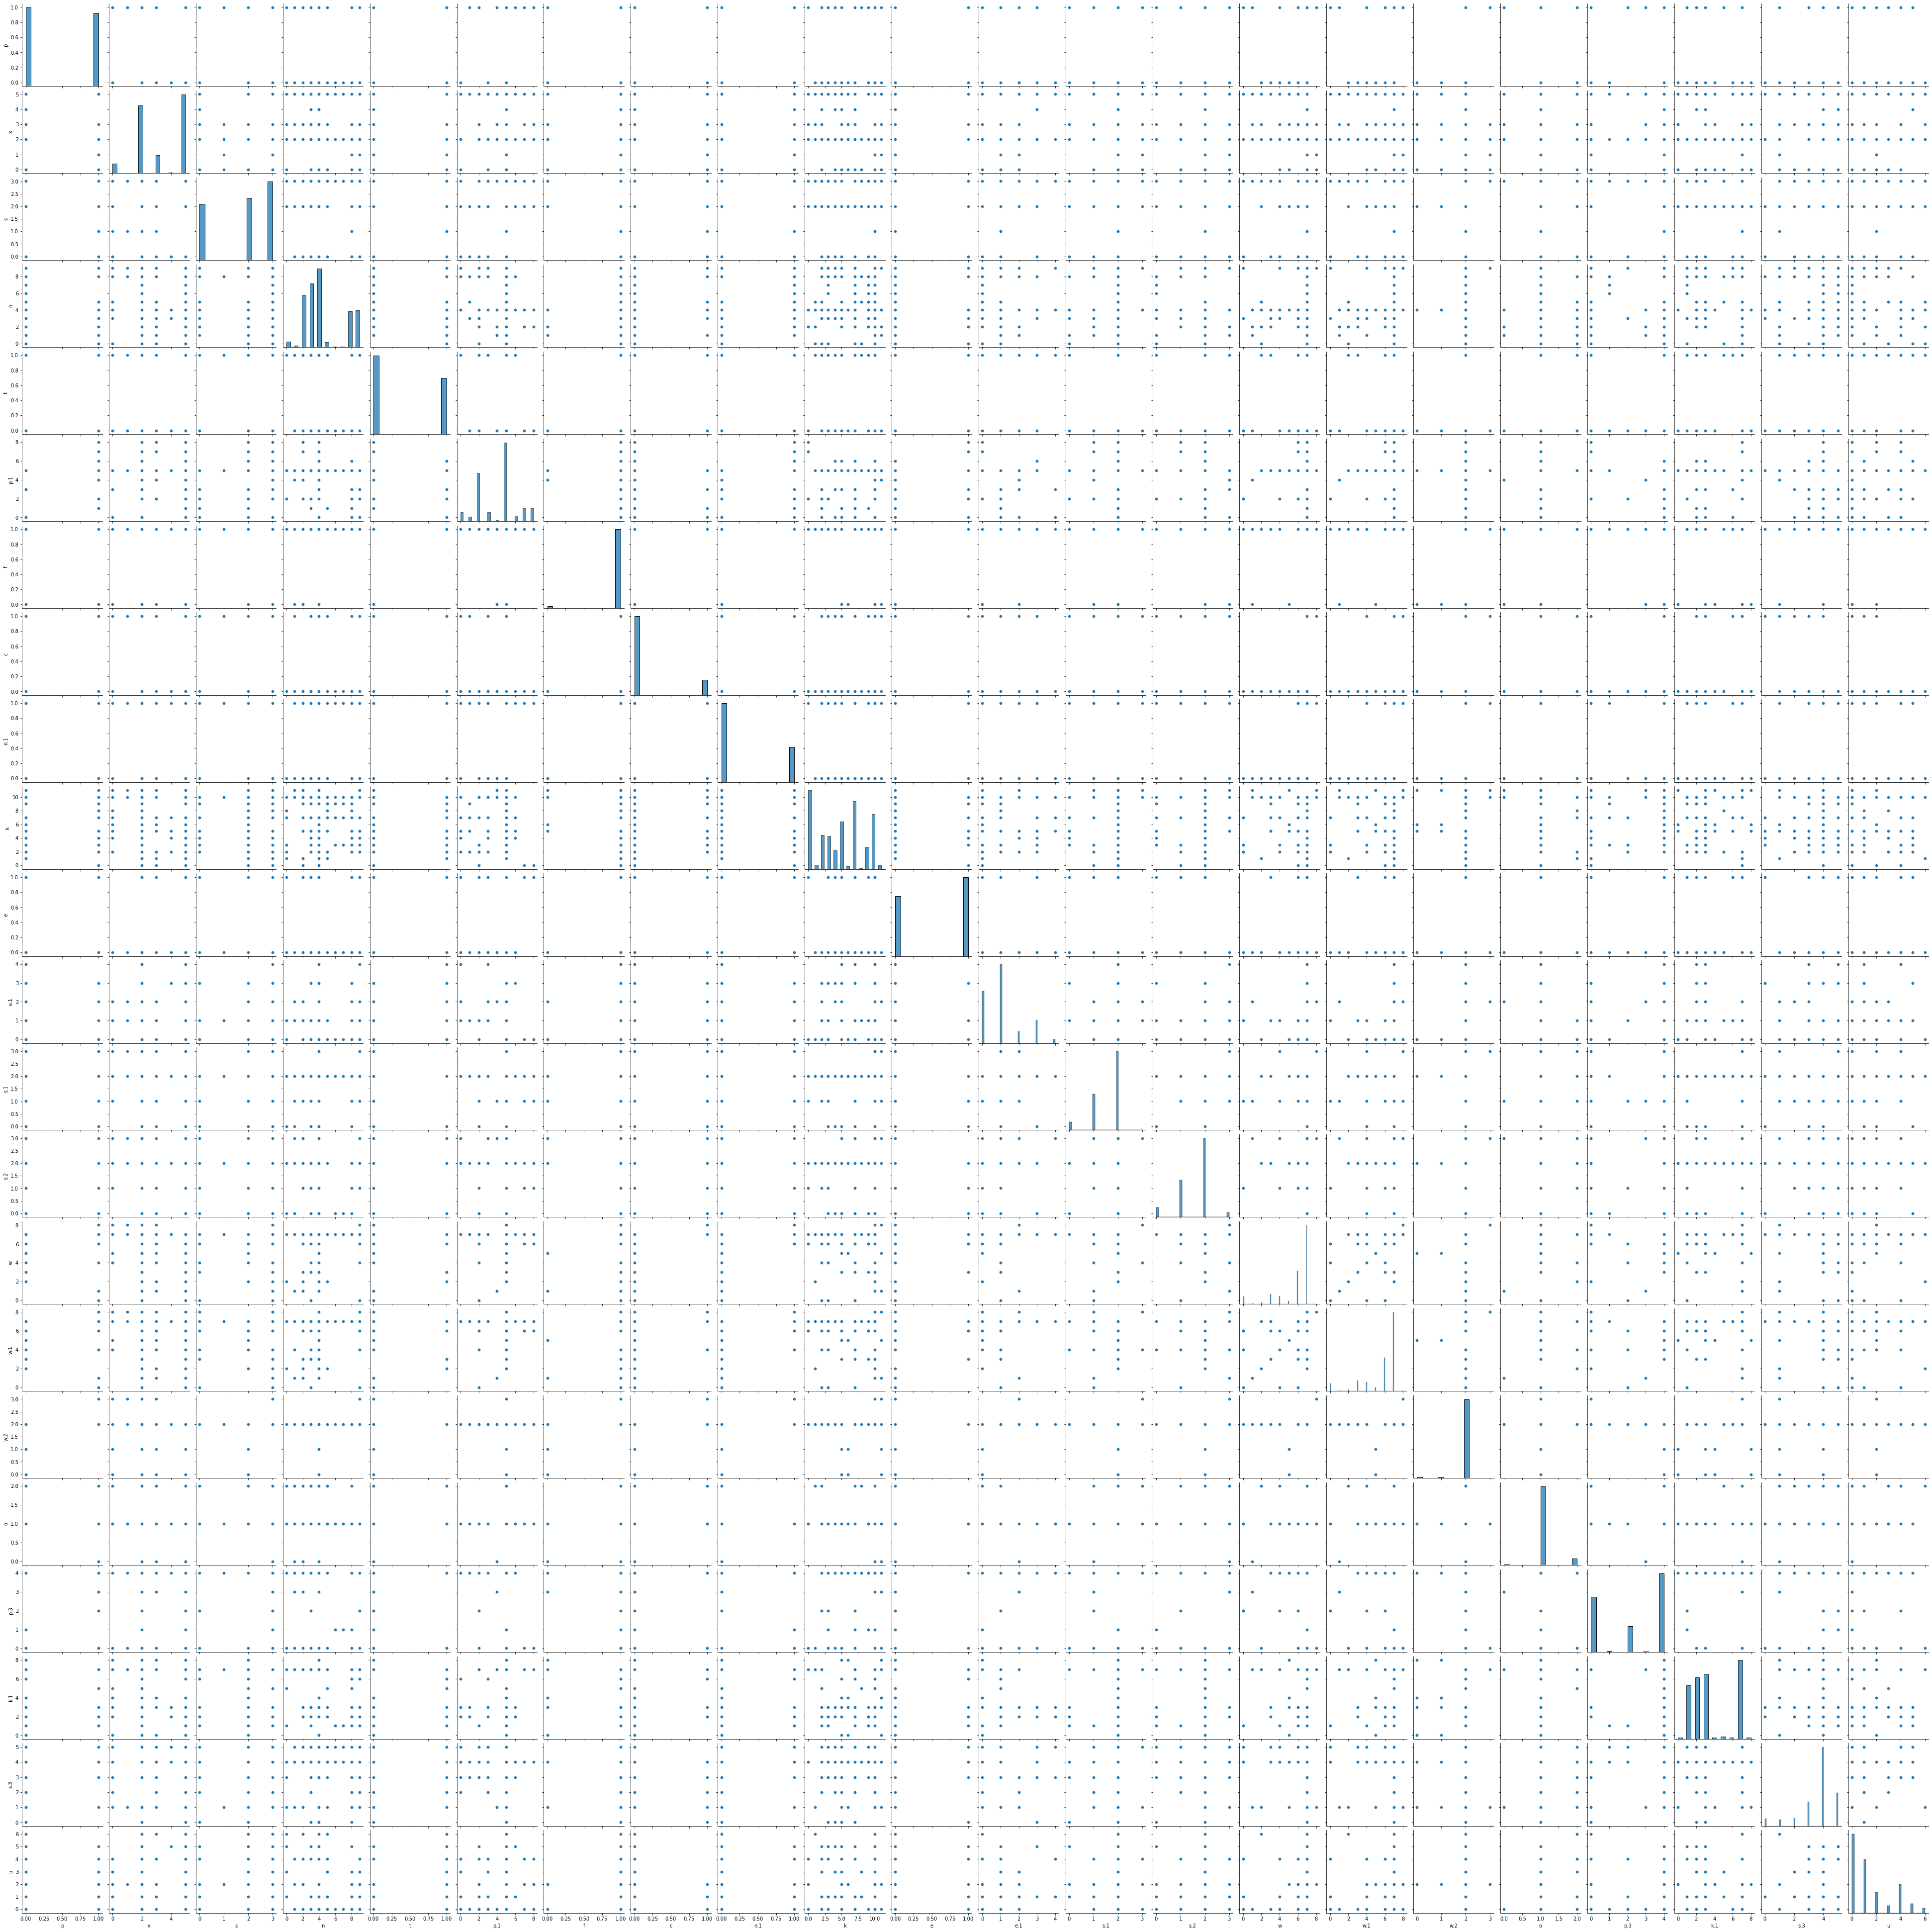

In [21]:
sns.pairplot(ds)

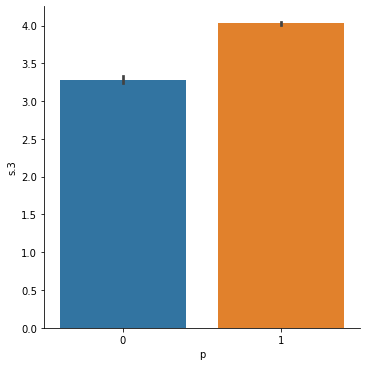

In [22]:
sns.catplot(x='p',y='s.3',data=ds,kind='bar')
plt.show()

In [23]:
ds.skew()

p      0.072201
x     -0.246839
s     -0.590773
n      0.706854
t      0.343051
p.1   -0.080555
f     -5.976678
c      1.839889
n.1    0.826228
k      0.061324
e     -0.271632
e.1    0.948311
s.1   -1.098553
s.2   -0.757513
w     -1.835253
w.1   -1.791413
w.2   -6.946490
o      2.701431
p.3   -0.289803
k.1    0.548227
s.3   -1.413251
u      0.985957
dtype: float64

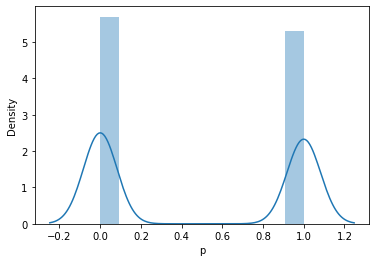

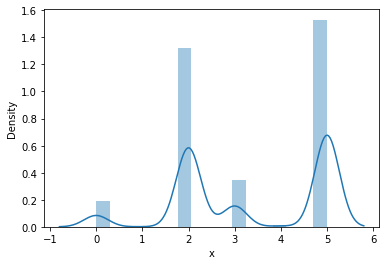

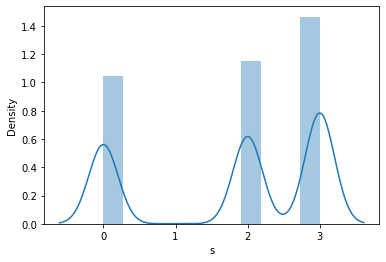

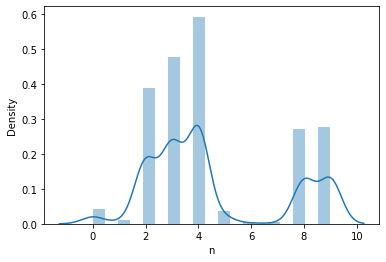

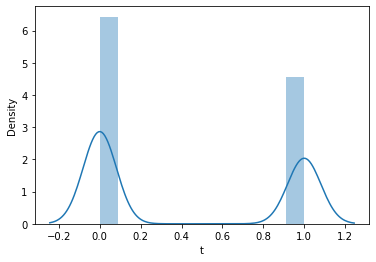

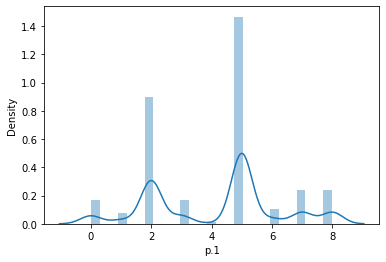

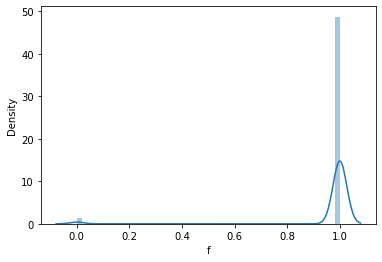

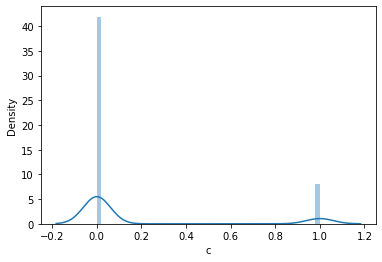

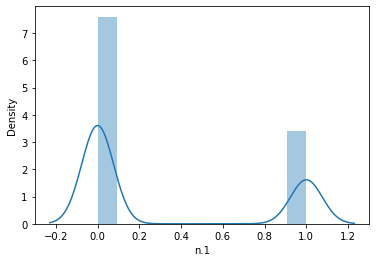

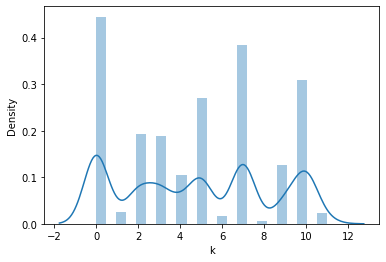

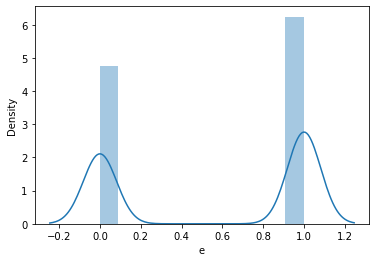

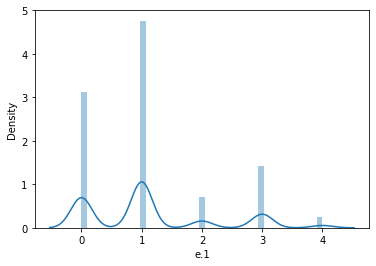

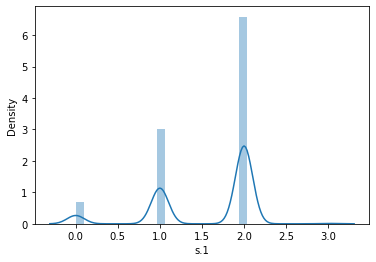

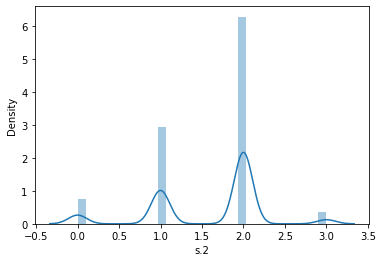

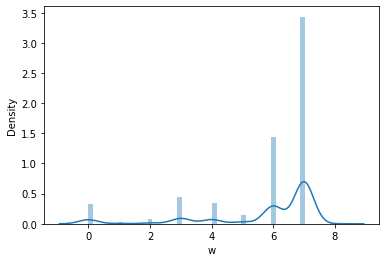

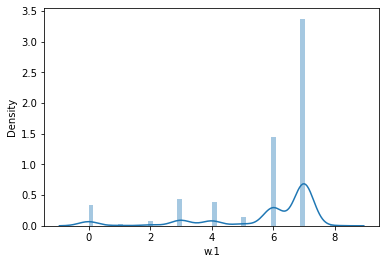

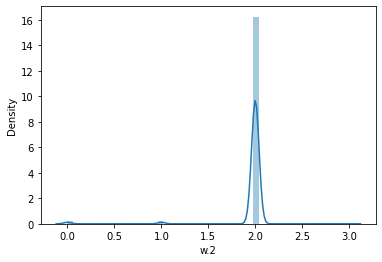

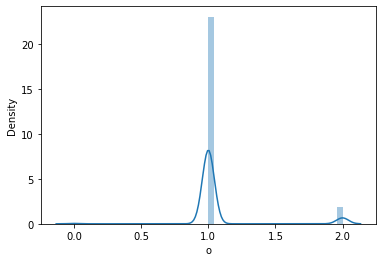

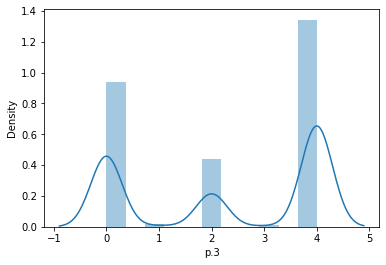

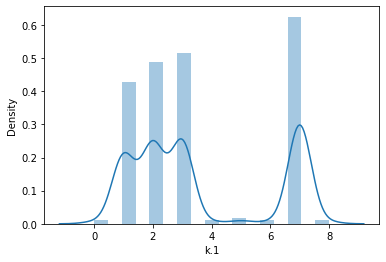

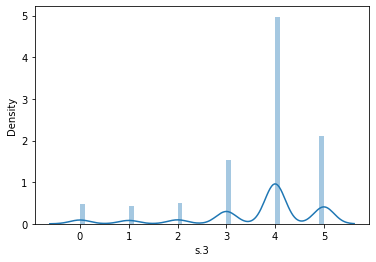

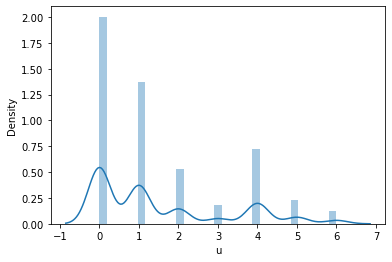

In [24]:
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])

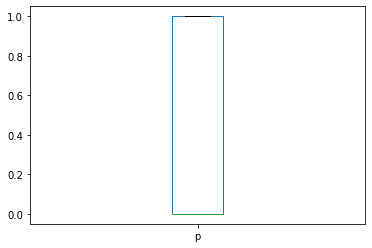

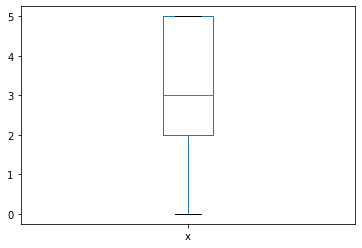

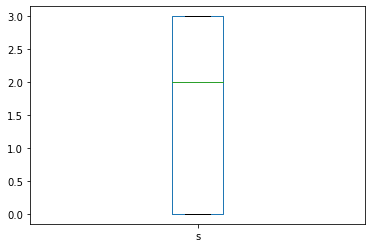

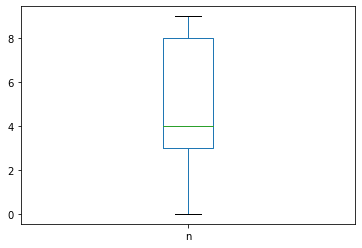

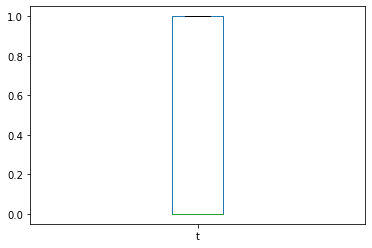

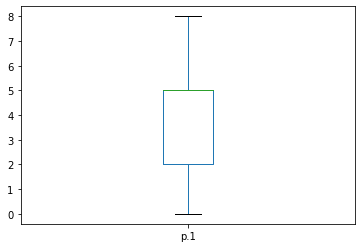

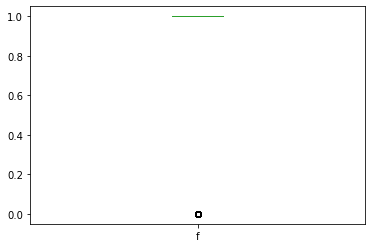

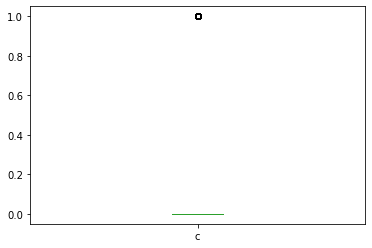

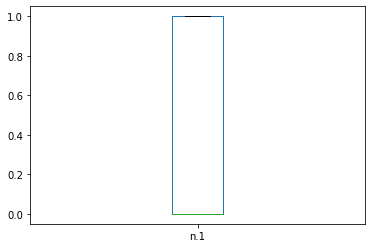

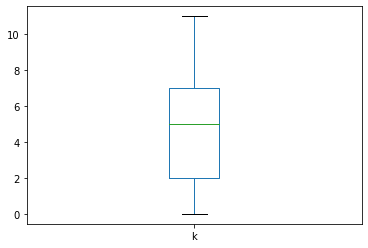

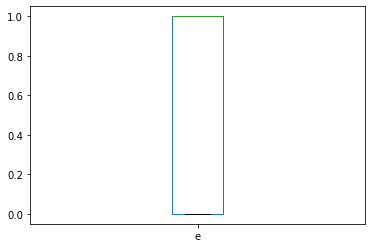

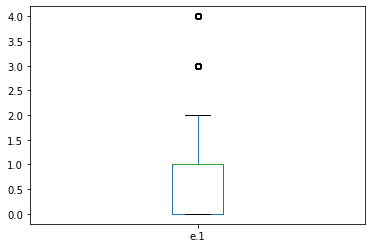

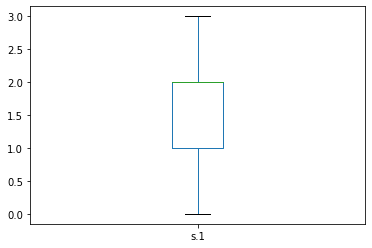

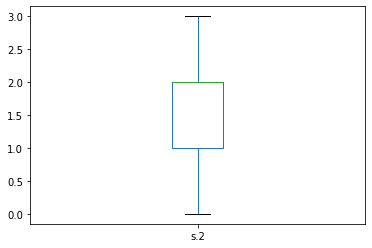

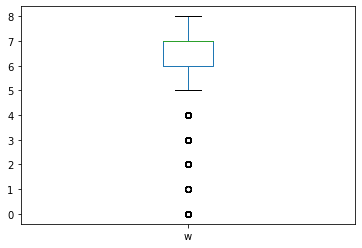

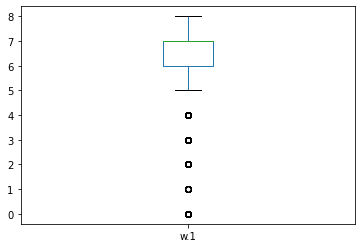

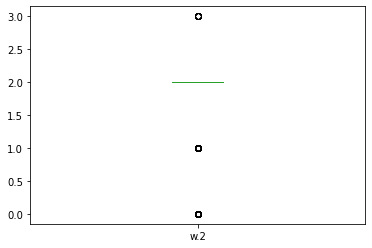

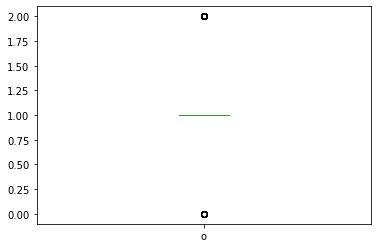

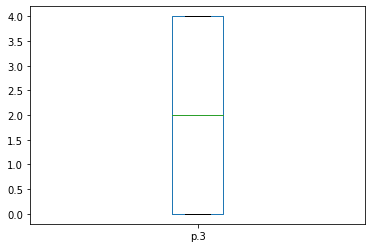

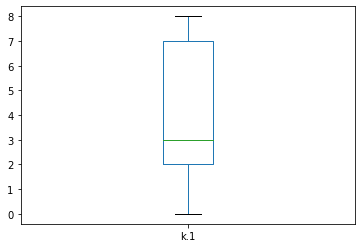

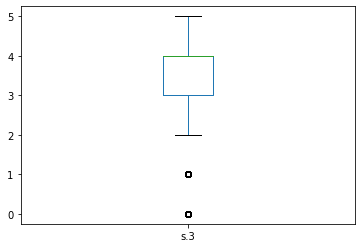

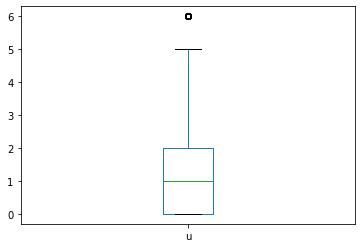

In [25]:
i=ds.iloc[:,1:23]
for i in ds:
    ds[i].plot.box()
    plt.show()

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[0.96455727, 1.02984283, 0.14013674, ..., 0.25054462, 1.3131121 ,
        0.29553654],
       [0.96455727, 2.08692816, 0.14013674, ..., 0.25054462, 1.3131121 ,
        0.86756584],
       [1.03674508, 1.02984283, 0.95323012, ..., 0.67025464, 0.51442924,
        2.03066822],
       ...,
       [0.96455727, 0.84021976, 0.14013674, ..., 1.50967469, 2.11179496,
        0.28601465],
       [1.03674508, 0.21686556, 0.95323012, ..., 1.42829549, 0.28425362,
        0.28601465],
       [0.96455727, 1.02984283, 0.14013674, ..., 0.16916541, 2.11179496,
        0.28601465]])

In [27]:
threshold=3
print(np.where(z>3))

(array([1815, 2127, 2127, ..., 8120, 8122, 8122], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [28]:
ds_new=ds[(z<3).all(axis=1)]

In [29]:
ds_new

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.1,s.2,w,w.1,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,0
8115,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
8116,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0
8117,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0


In [30]:
ploss=(1556/8123)*100
ploss

19.15548442693586

In [31]:
x=ds.iloc[:,1:23]

In [32]:
y=ds.iloc[:,0]

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
x=power_transform(x,method='yeo-johnson')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
sc = StandardScaler()

In [37]:
x = sc.fit_transform(x)

In [38]:
lr=LogisticRegression()

In [39]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu *100} found on random_state {best_rstate}")

Best Accuracy 84.89934196789989 found on random_state 107


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=107)

In [41]:
dtc=LogisticRegression()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9622486663931062
[[1187   35]
 [  57 1158]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1222
           1       0.97      0.95      0.96      1215

    accuracy                           0.96      2437
   macro avg       0.96      0.96      0.96      2437
weighted avg       0.96      0.96      0.96      2437



In [42]:
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy Score of',i,'is')
    print(accuracy_score(y_test,predi))
    print(confusion_matrix(y_test,predi))
    print(classification_report(y_test,predi))
    print('\n')

Accuracy Score of SVC() is
0.9991793188346327
[[1220    2]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



Accuracy Score of DecisionTreeClassifier() is
1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



Accuracy Score of KNeighborsClassifier() is
1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
        

In [43]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [45]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=111)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [46]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[1222    0]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1215

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [48]:
y_pred_prob=rf.predict_proba(x_test)[:,0]

In [49]:
y_pred_prob

array([0., 1., 0., ..., 1., 0., 1.])

In [50]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

In [51]:
tpr

array([0.        , 0.98281506, 0.99672668, 0.99918167, 1.        ,
       1.        , 1.        , 1.        ])

In [52]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00329218, 0.01646091, 1.        ])

In [53]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.93, 0.02, 0.01, 0.  ])

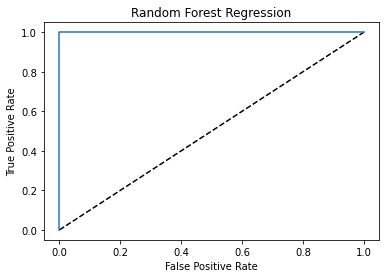

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Regression')
plt.show()

In [55]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [56]:
auc_score

1.0

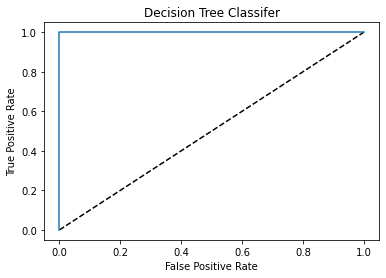

1.0

In [57]:
y_pred_prob1=dtc.predict_proba(x_test)[:,0]
tpr1,fpr1,thresholds1=roc_curve(y_test,y_pred_prob1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='Decision Tree Classifer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifer')
plt.show()

auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

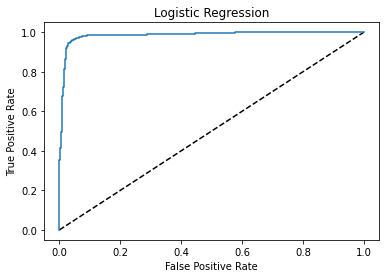

0.958123699258451

In [58]:
y_pred_prob2=lr.predict_proba(x_test)[:,0]
tpr2,fpr2,thresholds2=roc_curve(y_test,y_pred_prob2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

In [59]:
import joblib

In [60]:
joblib.dump(knn,'Mashroom_Dataset.pkl')

['Mashroom_Dataset.pkl']